In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data_df = pd.read_csv(url, header=None)

In [3]:
data_df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data_df.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'type']

In [5]:
data_df.head()

,variance,skewness,kurtosis,entropy,type
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
data_df['type'] = data_df['type'].map(lambda x: 'fake' if x == 0 else 'real')

In [7]:
data_df.head()

,variance,skewness,kurtosis,entropy,type
0,3.62160,8.6661,-2.8073,-0.44699,fake
1,4.54590,8.1674,-2.4586,-1.46210,fake
2,3.86600,-2.6383,1.9242,0.10645,fake
3,3.45660,9.5228,-4.0112,-3.59440,fake
4,0.32924,-4.4552,4.5718,-0.98880,fake


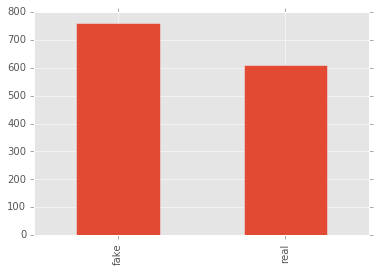

In [11]:
data_df.type.value_counts().plot(kind='bar')

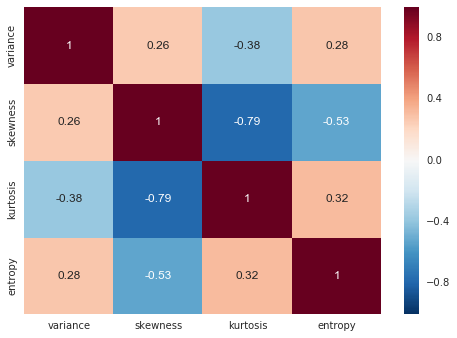

In [12]:
f_corrs = data_df.drop('type', axis=1).corr()

import seaborn as sns
sns.heatmap(f_corrs, annot=True)

In [14]:
data_df.groupby(by='type').describe().T

type       fake                                                            \
          count      mean       std     min       25%       50%       75%   
entropy   762.0 -1.147640  2.125077 -8.5482 -2.228250 -0.552380  0.423258   
kurtosis  762.0  0.796718  3.239894 -4.9417 -1.709700  0.700605  2.652925   
skewness  762.0  4.256627  5.138792 -6.9321  0.450063  5.668800  8.691975   
variance  762.0  2.276686  2.019348 -4.2859  0.883345  2.553100  3.884450   

type                real                                                   \
              max  count      mean       std      min       25%       50%   
entropy    2.4495  610.0 -1.246641  2.070984  -7.5887 -2.458375 -0.661650   
kurtosis   8.8294  610.0  2.148271  5.261811  -5.2861 -1.357500  0.373720   
skewness  12.9516  610.0 -0.993576  5.404884 -13.7731 -5.810025  0.172775   
variance   6.8248  610.0 -1.868443  1.881183  -7.0421 -3.061450 -1.806100   

type                         
               75%      max  
entropy   0.341790   2.1353  
kurtosis  5.626350  17.9274  
skewness  3.189275   9.6014  
variance -0.541770   2.3917

In [17]:
import statsmodels.formula.api as sm

model = sm.mnlogit(formula='type ~ kurtosis', data=data_df)
result = model.fit_regularized()
result.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.674789366537252
            Iterations: 7
            Function evaluations: 8
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1372
Model:                        MNLogit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Apr 2017   Pseudo R-squ.:                 0.01777
Time:                        00:23:32   Log-Likelihood:                -925.81
converged:                       True   LL-Null:                       -942.56
                                        LLR p-value:                 7.128e-09
================================================================================
y=type[real]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3286      0.058     -5.657      0.000      -0.443      -0.215
kurtosis         0.0740      0.013      5.677      0.000       0.048       0.100
================================================================================
"""

In [19]:
model = sm.mnlogit(formula='type ~ kurtosis + skewness', data=data_df)
result = model.fit_regularized()
result.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.510127652880333
            Iterations: 12
            Function evaluations: 13
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1372
Model:                        MNLogit   Df Residuals:                     1369
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Apr 2017   Pseudo R-squ.:                  0.2575
Time:                        00:24:21   Log-Likelihood:                -699.90
converged:                       True   LL-Null:                       -942.56
                                        LLR p-value:                4.089e-106
================================================================================
y=type[real]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8777      0.091      9.677      0.000       0.700       1.055
kurtosis        -0.3554      0.028    -12.734      0.000      -0.410      -0.301
skewness        -0.4167      0.024    -17.329      0.000      -0.464      -0.370
================================================================================
"""

In [20]:
model = sm.mnlogit(formula='type ~ kurtosis + skewness + variance', data=data_df)
result = model.fit_regularized()
result.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.019423702309360164
            Iterations: 37
            Function evaluations: 38
            Gradient evaluations: 37


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1372
Model:                        MNLogit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            3
Date:                Fri, 28 Apr 2017   Pseudo R-squ.:                  0.9717
Time:                        00:24:30   Log-Likelihood:                -26.649
converged:                       True   LL-Null:                       -942.56
                                        LLR p-value:                     0.000
================================================================================
y=type[real]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8850      1.384      4.975      0.000       4.173       9.597
kurtosis        -4.4642      0.901     -4.957      0.000      -6.229      -2.699
skewness        -3.5067      0.693     -5.059      0.000      -4.865      -2.148
variance        -6.7836      1.395     -4.863      0.000      -9.518      -4.049
================================================================================
"""

In [22]:
model = sm.mnlogit(formula='type ~ kurtosis + skewness + variance', data=data_df)
result = model.fit_regularized()
result.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.019423702309360164
            Iterations: 37
            Function evaluations: 38
            Gradient evaluations: 37


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 1372
Model:                        MNLogit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            3
Date:                Fri, 28 Apr 2017   Pseudo R-squ.:                  0.9717
Time:                        00:25:13   Log-Likelihood:                -26.649
converged:                       True   LL-Null:                       -942.56
                                        LLR p-value:                     0.000
================================================================================
y=type[real]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8850      1.384      4.975      0.000       4.173       9.597
kurtosis        -4.4642      0.901     -4.957      0.000      -6.229      -2.699
skewness        -3.5067      0.693     -5.059      0.000      -4.865      -2.148
variance        -6.7836      1.395     -4.863      0.000      -9.518      -4.049
================================================================================
"""

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

fold = StratifiedKFold(n_splits=5, shuffle=True)

In [51]:
cv_results = []
labels = ['real', 'fake']

for train_idx, test_idx in fold.split(data_df['type'], data_df['type']):
    
    model = sm.mnlogit(formula='type ~ kurtosis + skewness + variance', data=data_df.iloc[train_idx])
    result = model.fit_regularized()
    test_df = data_df.iloc[test_idx].drop('type', axis=1)

    predicted = model.predict(params=result.params, exog=test_df)
    predicted_df = pd.DataFrame(predicted, index=test_df.index)
    predicted_result = predicted_df.apply(lambda v: labels[np.argmax(v)], axis=1)
    
    cv_result = pd.concat([predicted_result, data_df['type'].iloc[test_idx]], axis=1, keys=['predicted', 'actual'])
    
    cv_results.append(cv_result)    
   

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.018791758284944213
            Iterations: 38
            Function evaluations: 39
            Gradient evaluations: 38
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.02144646670917154
            Iterations: 36
            Function evaluations: 38
            Gradient evaluations: 36
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.020630208801113218
            Iterations: 38
            Function evaluations: 39
            Gradient evaluations: 38
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.016672272743164355
            Iterations: 37
            Function evaluations: 38
            Gradient evaluations: 37
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.01844163066723348
            Iterations: 37
           

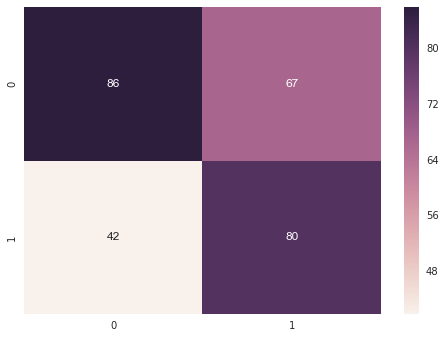

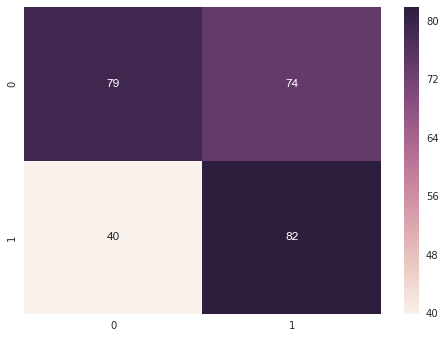

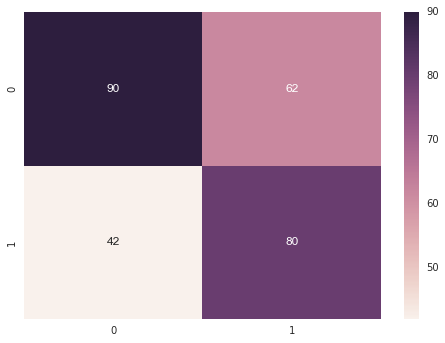

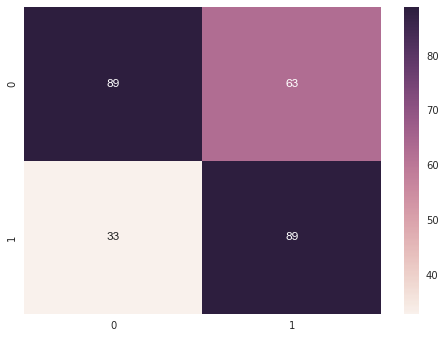

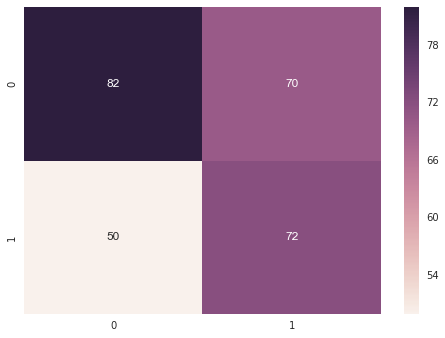

In [52]:
from sklearn.metrics import confusion_matrix

for r in cv_results:
    pylab.figure()
    c = confusion_matrix(r['actual'], r['predicted'])
    sns.heatmap(c, annot=True)


In [53]:
f1_scores = [f1_score(r['actual'], r['predicted'], average='macro') for r in cv_results]
    

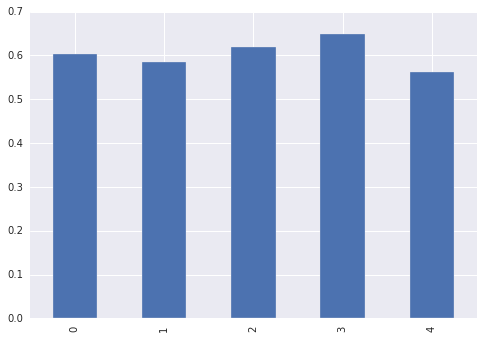

In [54]:
pd.Series(f1_scores).plot(kind='bar')

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


In [60]:
estimator = GaussianNB()

features_df = data_df.drop('type', axis=1)
labels = data_df['type']
scores = cross_val_score(estimator, features_df, labels, cv=5, scoring='f1_macro')

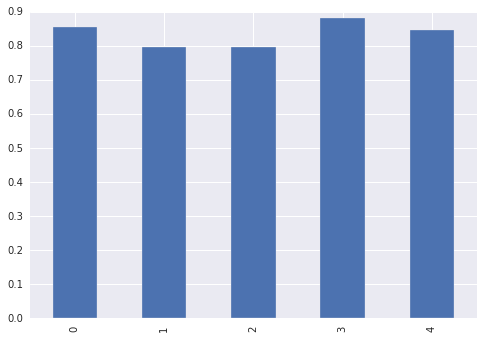

In [61]:
pd.Series(scores).plot(kind='bar')

In [64]:
estimator = GaussianNB()

features_df = data_df.drop(['type', 'entropy'], axis=1)
labels = data_df['type']
scores = cross_val_score(estimator, features_df, labels, cv=5, scoring='f1_macro')

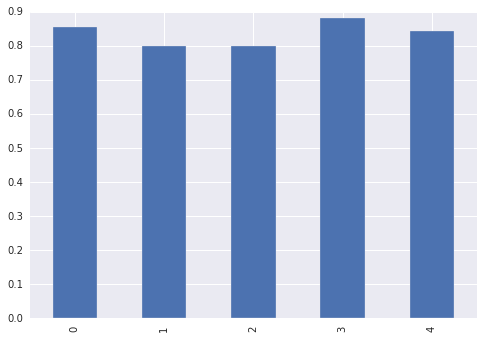

In [65]:
pd.Series(scores).plot(kind='bar')